In [2]:
import mlflow
from mlflow.tracking import MlflowClient
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Conectar con MLflow local
mlflow.set_tracking_uri("http://localhost:5000")
client = MlflowClient()

In [4]:
# Lista de experimentos que quieres comparar
experimentos = [
    "DQN_SpaceInvaders",
    "DQN_SpaceInvaders_Optuna",
    "A2C_SpaceInvaders",
    "A2C_SpaceInvaders_optuna",
    "PPO_SpaceInvaders"
]

# Obtener los runs de cada experimento
todos_los_runs = []

In [6]:
# Inspecciona un run cualquiera de uno de los experimentos
exp = client.get_experiment_by_name("DQN_SpaceInvaders")
runs = client.search_runs(exp.experiment_id)

# Muestra las métricas registradas en el primer run
runs[0].data.metrics

{'action_0_count': 908.0,
 'action_0_percentage': 0.03415845308855617,
 'action_1_count': 13502.0,
 'action_1_percentage': 0.5079377022044993,
 'action_2_count': 1285.0,
 'action_2_percentage': 0.048340982619817924,
 'action_3_count': 752.0,
 'action_3_percentage': 0.02828982017906854,
 'action_4_count': 3129.0,
 'action_4_percentage': 0.11771123316529983,
 'action_5_count': 7006.0,
 'action_5_percentage': 0.26356180874275825,
 'episode_length_mean': 265.99,
 'episode_length_std': 6.428499047211565,
 'episode_reward_max': 31.0,
 'episode_reward_mean': 8.12,
 'episode_reward_min': 0.0,
 'episode_reward_std': 6.428499047211565,
 'exploration_rate': 0.01,
 'loss_mean': 0.007111750543117523,
 'test_reward': 8.010000228881836,
 'test_reward_max': 17.0,
 'test_reward_min': 0.0,
 'test_reward_std': 5.518143177032471,
 'timesteps': 10000000.0,
 'training_updates': 2474999.0}

In [8]:
metric_name = "test_reward"  

todos_los_runs = []

for nombre in experimentos:
    exp = client.get_experiment_by_name(nombre)
    if exp is not None:
        runs = client.search_runs(exp.experiment_id)
        for run in runs:
            valor = run.data.metrics.get(metric_name)
            if valor is not None:
                datos = {
                    "experiment": nombre,
                    "run_id": run.info.run_id,
                    metric_name: valor
                }
                todos_los_runs.append(datos)

df = pd.DataFrame(todos_los_runs)
df[metric_name] = df[metric_name].astype(float)
df.head()


,experiment,run_id,test_reward
0,DQN_SpaceInvaders,914f23523dcf4539966b840d8b4d6955,8.01
1,DQN_SpaceInvaders,74e3f6259b2b41919eb3f05a79c75b11,4.14
2,DQN_SpaceInvaders,e68170d3002f41529497b13366d51e06,5.62
3,DQN_SpaceInvaders,58963b0bf631429a95513259eb63338b,0.00
4,DQN_SpaceInvaders,6bcfe267164e42c2acdfc8a278b0b4c9,5.95


In [9]:
import mlflow
from mlflow.tracking import MlflowClient
import pandas as pd
import matplotlib.pyplot as plt

mlflow.set_tracking_uri("http://localhost:5000")
client = MlflowClient()

experimentos = [
    "DQN_SpaceInvaders",
    "DQN_SpaceInvaders_Optuna",
    "A2C_SpaceInvaders",
    "A2C_SpaceInvaders_optuna",
    "PPO_SpaceInvaders",
    "QRDQN_SpaceInvaders"
]

mejores_runs = []

for nombre in experimentos:
    exp = client.get_experiment_by_name(nombre)
    if exp is not None:
        runs = client.search_runs(exp.experiment_id)
        # Filtrar solo los que tienen test_reward
        runs_con_reward = [run for run in runs if "test_reward" in run.data.metrics]
        if not runs_con_reward:
            continue
        # Ordenar por test_reward descendente
        mejor_run = max(runs_con_reward, key=lambda r: r.data.metrics["test_reward"])
        mejores_runs.append({
            "experiment": nombre,
            "run_id": mejor_run.info.run_id,
            "test_reward": mejor_run.data.metrics["test_reward"]
        })

# DataFrame con los mejores runs
df_best = pd.DataFrame(mejores_runs)
df_best["test_reward"] = df_best["test_reward"].astype(float)
df_best


,experiment,run_id,test_reward
0,DQN_SpaceInvaders,d8e3ea56f6bc46f9aef82c2ea870db51,15.900000
1,DQN_SpaceInvaders_Optuna,dd77d1d506064c8987b5070586b8803a,5.980000
2,A2C_SpaceInvaders,f445012c13154edcbadfe3ed0f7187ef,31.510000
3,A2C_SpaceInvaders_optuna,ab6e516b31474256a849882d8c73cd64,17.260000
4,PPO_SpaceInvaders,95c2decd982545278b2929f016ad6d44,52.820000
5,QRDQN_SpaceInvaders,78cd4d25f19e4ed996d0d864f1969eb4,26.549999


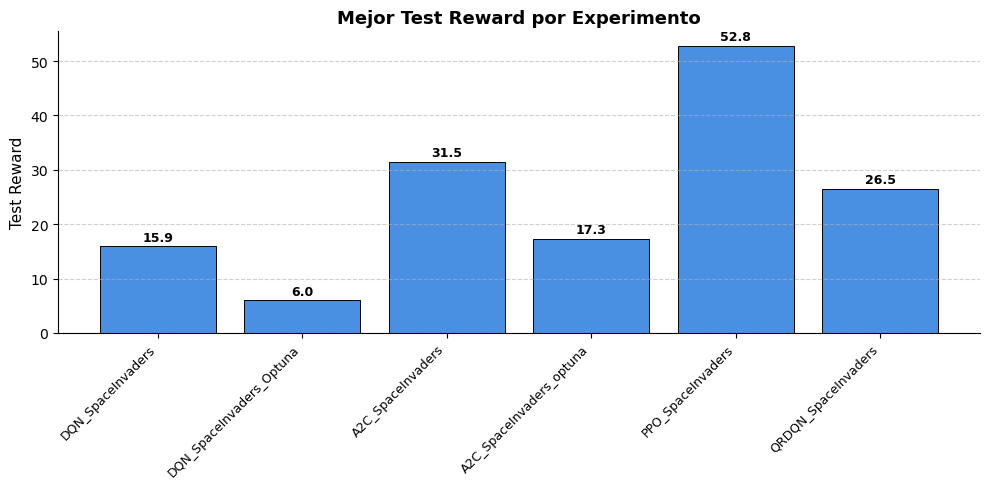

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
bars = plt.bar(df_best["experiment"], df_best["test_reward"], color="#4A90E2", edgecolor="black", linewidth=0.7)

# Agregar etiquetas de valor encima de cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.1f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=9)
plt.ylabel("Test Reward", fontsize=11)
plt.title("Mejor Test Reward por Experimento", fontsize=13, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Opcional: quitar bordes superiores y derechos para estilo más limpio
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


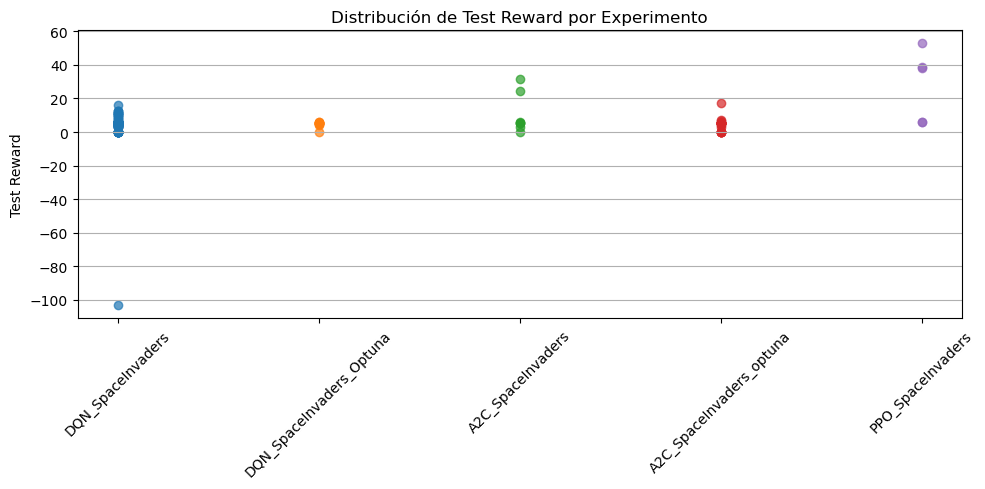

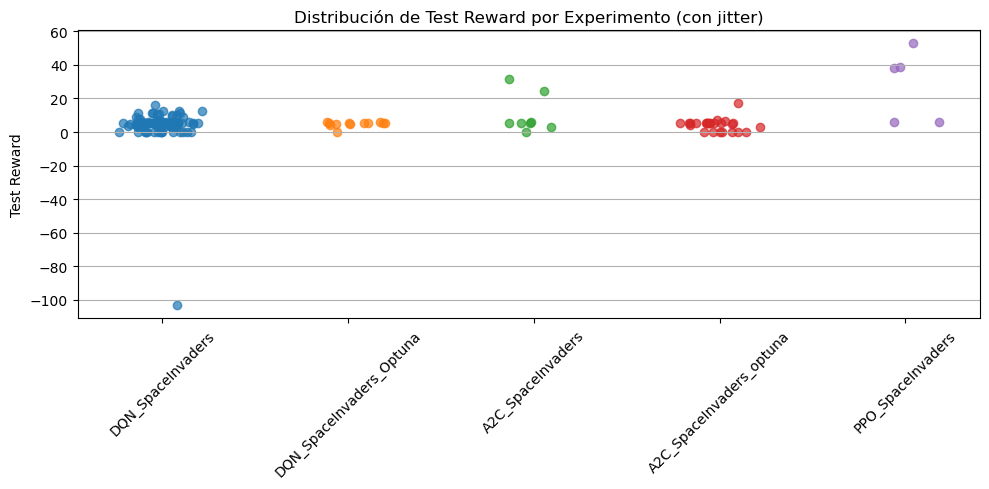

In [15]:
plt.figure(figsize=(10, 5))
for nombre in df["experiment"].unique():
    sub_df = df[df["experiment"] == nombre]
    plt.scatter([nombre]*len(sub_df), sub_df["test_reward"], alpha=0.7, label=nombre)

plt.title("Distribución de Test Reward por Experimento")
plt.ylabel("Test Reward")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

import numpy as np

plt.figure(figsize=(10, 5))
for i, nombre in enumerate(df["experiment"].unique()):
    sub_df = df[df["experiment"] == nombre]
    jitter_x = np.random.normal(loc=i, scale=0.1, size=len(sub_df))  # jitter horizontal
    plt.scatter(jitter_x, sub_df["test_reward"], alpha=0.7, label=nombre)

plt.title("Distribución de Test Reward por Experimento (con jitter)")
plt.ylabel("Test Reward")
plt.xticks(ticks=range(len(df["experiment"].unique())), labels=df["experiment"].unique(), rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Basándonos en el test_reward máximo por experimento, el algoritmo PPO logró el mejor rendimiento absoluto (52.8), seguido por A2C (31.5) y QRDQN (26.5). Por el contrario, DQN con Optuna obtuvo el peor resultado (6.0).

Pero más importante que el valor máximo, al observar la distribución completa de test_reward por experimento, podemos sacar conclusiones más robustas sobre consistencia y estabilidad:

1. PPO_SpaceInvaders
* Alto rendimiento en múltiples ejecuciones.
* Pocos valores bajos → muy consistente.
* El mejor balance entre rendimiento y robustez.

2. A2C_SpaceInvaders
* Distribución más amplia: algunos runs muy buenos, otros modestos.
* Buen resultado medio, pero menos consistente que PPO.

3. A2C_SpaceInvaders_Optuna
* Distribución estrecha con valores bajos-medios.
* Mejor estabilidad que su versión sin Optuna, pero sin grandes mejoras de rendimiento.

4. DQN_SpaceInvaders y DQN_SpaceInvaders_Optuna
* Valores concentrados en la parte baja.
* Un outlier extremo a -100 en DQN indica gran inestabilidad.
* En general, rendimiento pobre y poco fiable, incluso con Optuna.